![alt text](images/Kusto.jpg "Kusto Magic")

# Kqlmagic Quick Start
1. Press F11 to switch browser to full screen mode  
2. If in running jupyter lab, in View tab, select 'Single-Document Mode' and 'Presentation Mode' or  (Ctrl + Shift + D)  
3. In Kernel tab, select 'Restart Kernel and Clear All Outputs...', to start from fresh
4. Repeat: press Shift+Enter to run cells sequentially

## Make sure that you have the lastest version of  Kqlmagic
Download Kqlmagic from PyPI and install/update
(if latest version is already installed you can skip this step)

In [ ]:
#!pip install Kqlmagic --upgrade

## If you want to pre-set defaults, set environment varaible, before activation notebook, or within notebook
- **KQLMAGIC_NOTEBOOK_APP** - set the notebook application (default **jupyternotebook**)
- **KQLMAGIC_LOAD_MODE** - set the kqlmagic load mode (default **verbose**). If silent, it will load without welcome output
- **KQLMAGIC_CONFIGURATION** - modify the default configuration, key=value pairs must be separated by a **semicolon**

- **KQLMAGIC_CONNECTION_STR** - set the default connection string (default **None**). If set it will connect to it on Kqlmagic load

In [ ]:
# you can try it within the notebook, by setting the environment variable using %env magic

#%env KQLMAGIC_NOTEBOOK_APP=jupyterlab
#%env KQLMAGIC_LOAD_MODE=silent
#%env KQLMAGIC_CONFIGURATION="show_query_time=False;plot_package='plotly';display_limit=100"

#%env KQLMAGIC_CONNECTION_STR=appinsights://appid='DEMO_APP';appkey='DEMO_KEY'

## Add Kqlmagic to notebook magics

C:\My Projects\jupyter-Kqlmagic-microsoft-vsc\azure



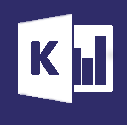

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

c:\My Projects\jupyter-Kqlmagic-microsoft-vsc\notebooks
popd -> c:\My Projects\jupyter-Kqlmagic-microsoft-vsc\notebooks


In [1]:
%pushd C:\My Projects\jupyter-Kqlmagic-microsoft-vsc\azure
%reload_ext Kqlmagic
%popd

  - ### <span style="color:#82CAFA">*Note: information is included in the Kqlmagic banner, and in the note below it, with version and location of the open source code*</span>
  - ### <span style="color:#82CAFA">*Note: after Kqlmagic was loaded, kql reference was added to Help menu (Help tab)*</span>

## Connect to appid@appinsights
there are few options to authenticate with Apllication Insights:<br>
```python
%kql appinsights://appid='<app-id>';appkey='<app-key>';alias='<appid-friendly-name>'
```
```python
%kql appinsights://code;appid='<app-id>';alias='<appid-friendly-name>'
```
```python
%kql appinsights://tenant='<tenant-id>';clientid='<aad-appid>';clientsecret='<aad-appkey>';appid='<app-id>';alias='<appid-friendly-name>'
```
```python
%kql appinsights://username='<username>';password='<password>';appid='<app-id>';alias='<appid-friendly-name>'
```

Notes:<br>
(1) username/password works only on corporate network.<br>
(2) alias is optional.<br>
(3) if credentials are missing, and a previous connection was established the credentials will be inherited.<br>
(4) if secret (password / clientsecret / appkey) is missing, user will be prompted to provide it.<br>
(5) if tenant is missing, and a previous connection was established the tenant will be inherited.

In [2]:
%kql appinsights://appid='DEMO_APP';appkey='DEMO_KEY'

<IPython.core.display.Javascript object>

  - ### <span style="color:#82CAFA">*Note - popup window that opened with the appid@appinsights schema*</span>
  - ### <span style="color:#82CAFA">*Note - Help menu contains the appid@appinsights schema*</span>

## Once connected you can query the current appid@appinsights

In [3]:
%kql pageViews | where client_City != '' | summarize count() by client_City | sort by count_ | limit 10

client_City,count_
Bothell,3909321
Peterborough,1466952
Baotou,1194837
Rottweil,1014910
Nantes,873396
Sao Goncalo,747577
Yokohama,696221
Lake Stevens,592257
Zapopan,274678
Tokyo,104551


[{'client_City': 'Bothell', 'count_': 3909321},
 {'client_City': 'Peterborough', 'count_': 1466952},
 {'client_City': 'Baotou', 'count_': 1194837},
 {'client_City': 'Rottweil', 'count_': 1014910},
 {'client_City': 'Nantes', 'count_': 873396},
 {'client_City': 'Sao Goncalo', 'count_': 747577},
 {'client_City': 'Yokohama', 'count_': 696221},
 {'client_City': 'Lake Stevens', 'count_': 592257},
 {'client_City': 'Zapopan', 'count_': 274678},
 {'client_City': 'Tokyo', 'count_': 104551}]

## Python code can access the result by the \_ variable

In [4]:
_

client_City,count_
Bothell,3909321
Peterborough,1466952
Baotou,1194837
Rottweil,1014910
Nantes,873396
Sao Goncalo,747577
Yokohama,696221
Lake Stevens,592257
Zapopan,274678
Tokyo,104551


[{'client_City': 'Bothell', 'count_': 3909321},
 {'client_City': 'Peterborough', 'count_': 1466952},
 {'client_City': 'Baotou', 'count_': 1194837},
 {'client_City': 'Rottweil', 'count_': 1014910},
 {'client_City': 'Nantes', 'count_': 873396},
 {'client_City': 'Sao Goncalo', 'count_': 747577},
 {'client_City': 'Yokohama', 'count_': 696221},
 {'client_City': 'Lake Stevens', 'count_': 592257},
 {'client_City': 'Zapopan', 'count_': 274678},
 {'client_City': 'Tokyo', 'count_': 104551}]

## Converts result data to a dataframe

In [5]:
df = _.to_dataframe()
df

,client_City,count_
0,Bothell,3909321
1,Peterborough,1466952
2,Baotou,1194837
3,Rottweil,1014910
4,Nantes,873396
5,Sao Goncalo,747577
6,Yokohama,696221
7,Lake Stevens,592257
8,Zapopan,274678
9,Tokyo,104551


In [6]:
df.head()

,client_City,count_
0,Bothell,3909321
1,Peterborough,1466952
2,Baotou,1194837
3,Rottweil,1014910
4,Nantes,873396


In [7]:
df.client_City

0         Bothell
1    Peterborough
2          Baotou
3        Rottweil
4          Nantes
5     Sao Goncalo
6        Yokohama
7    Lake Stevens
8         Zapopan
9           Tokyo
Name: client_City, dtype: object

In [8]:
df.min()

client_City    Baotou
count_         104551
dtype: object

In [9]:
df.to_json()

'{"client_City":{"0":"Bothell","1":"Peterborough","2":"Baotou","3":"Rottweil","4":"Nantes","5":"Sao Goncalo","6":"Yokohama","7":"Lake Stevens","8":"Zapopan","9":"Tokyo"},"count_":{"0":3909321,"1":1466952,"2":1194837,"3":1014910,"4":873396,"5":747577,"6":696221,"7":592257,"8":274678,"9":104551}}'

In [10]:
df.columns

Index(['client_City', 'count_'], dtype='object')

## Excution of another cell overrides \_ , However,  \_kql\_raw\_result\_ python variable holds last kql query result 

In [11]:
_

Index(['client_City', 'count_'], dtype='object')

In [12]:
_kql_raw_result_

client_City,count_
Bothell,3909321
Peterborough,1466952
Baotou,1194837
Rottweil,1014910
Nantes,873396
Sao Goncalo,747577
Yokohama,696221
Lake Stevens,592257
Zapopan,274678
Tokyo,104551


[{'client_City': 'Bothell', 'count_': 3909321},
 {'client_City': 'Peterborough', 'count_': 1466952},
 {'client_City': 'Baotou', 'count_': 1194837},
 {'client_City': 'Rottweil', 'count_': 1014910},
 {'client_City': 'Nantes', 'count_': 873396},
 {'client_City': 'Sao Goncalo', 'count_': 747577},
 {'client_City': 'Yokohama', 'count_': 696221},
 {'client_City': 'Lake Stevens', 'count_': 592257},
 {'client_City': 'Zapopan', 'count_': 274678},
 {'client_City': 'Tokyo', 'count_': 104551}]

In [13]:
_

client_City,count_
Bothell,3909321
Peterborough,1466952
Baotou,1194837
Rottweil,1014910
Nantes,873396
Sao Goncalo,747577
Yokohama,696221
Lake Stevens,592257
Zapopan,274678
Tokyo,104551


[{'client_City': 'Bothell', 'count_': 3909321},
 {'client_City': 'Peterborough', 'count_': 1466952},
 {'client_City': 'Baotou', 'count_': 1194837},
 {'client_City': 'Rottweil', 'count_': 1014910},
 {'client_City': 'Nantes', 'count_': 873396},
 {'client_City': 'Sao Goncalo', 'count_': 747577},
 {'client_City': 'Yokohama', 'count_': 696221},
 {'client_City': 'Lake Stevens', 'count_': 592257},
 {'client_City': 'Zapopan', 'count_': 274678},
 {'client_City': 'Tokyo', 'count_': 104551}]

## Show a chart, render the query to the proper chart

In [14]:
%kql pageViews | where client_City != '' | summarize count() by client_City | sort by count_ | limit 10 | render piechart title='my apple pie' 

FigureWidget({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'labels': [Bothell, P…

[{'client_City': 'Bothell', 'count_': 3909321},
 {'client_City': 'Peterborough', 'count_': 1466952},
 {'client_City': 'Baotou', 'count_': 1194837},
 {'client_City': 'Rottweil', 'count_': 1014910},
 {'client_City': 'Nantes', 'count_': 873396},
 {'client_City': 'Sao Goncalo', 'count_': 747577},
 {'client_City': 'Yokohama', 'count_': 696221},
 {'client_City': 'Lake Stevens', 'count_': 592257},
 {'client_City': 'Zapopan', 'count_': 274678},
 {'client_City': 'Tokyo', 'count_': 104551}]

  - ### <span style="color:#82CAFA">*Note: the chart is interactive, hoover to the right upper corner to get the menu, click on the legend to toggle facets, hoover on the chart to get value and percentage*</span>

## Assign kql query result to a python variable

In [15]:
%kql my_bar_chart << pageViews | where client_City != '' | summarize count() by client_City | sort by count_ | limit 10 | render barchart title='my bar chart'

  - ### <span style="color:#82CAFA">*Note: nothing is displayed when the result is assigtned to a variable*</span>

## Display kql result object

In [16]:
my_bar_chart

FigureWidget({
    'data': [{'marker': {'color': 'rgb(31, 118, 179)'},
              'name': 'count_',
       …

[{'client_City': 'Bothell', 'count_': 3909321},
 {'client_City': 'Peterborough', 'count_': 1466952},
 {'client_City': 'Baotou', 'count_': 1194837},
 {'client_City': 'Rottweil', 'count_': 1014910},
 {'client_City': 'Nantes', 'count_': 873396},
 {'client_City': 'Sao Goncalo', 'count_': 747577},
 {'client_City': 'Yokohama', 'count_': 696221},
 {'client_City': 'Lake Stevens', 'count_': 592257},
 {'client_City': 'Zapopan', 'count_': 274678},
 {'client_City': 'Tokyo', 'count_': 104551}]

## Access table data

In [17]:
my_bar_chart.show_table()

client_City,count_
Bothell,3909321
Peterborough,1466952
Baotou,1194837
Rottweil,1014910
Nantes,873396
Sao Goncalo,747577
Yokohama,696221
Lake Stevens,592257
Zapopan,274678
Tokyo,104551


In [18]:
my_bar_chart[1]

{'client_City': 'Peterborough', 'count_': 1466952}

In [19]:
my_bar_chart[1][1:]

{'count_': 1466952}

In [20]:
my_bar_chart[1]['client_City']

'Peterborough'

In [21]:
my_bar_chart[1:5]

[{'client_City': 'Peterborough', 'count_': 1466952},
 {'client_City': 'Baotou', 'count_': 1194837},
 {'client_City': 'Rottweil', 'count_': 1014910},
 {'client_City': 'Nantes', 'count_': 873396}]

In [22]:
requests = %kql requests | project name, customDimensions | limit 5
requests

name,customDimensions
GET Home/Index,"{ [34;01m""_MS.ProcessedByMetricExtractors""[39;49;00m: [33m""(Name:'Requests', Ver:'1.1')""[39;49;00m}"
GET Home/Index,"{ [34;01m""_MS.ProcessedByMetricExtractors""[39;49;00m: [33m""(Name:'Requests', Ver:'1.1')""[39;49;00m}"
GET Home/Index,"{ [34;01m""_MS.ProcessedByMetricExtractors""[39;49;00m: [33m""(Name:'Requests', Ver:'1.1')""[39;49;00m}"
GET Home/Index,"{ [34;01m""_MS.ProcessedByMetricExtractors""[39;49;00m: [33m""(Name:'Requests', Ver:'1.1')""[39;49;00m}"
GET Home/Index,"{ [34;01m""_MS.ProcessedByMetricExtractors""[39;49;00m: [33m""(Name:'Requests', Ver:'1.1')""[39;49;00m}"


[{'name': 'GET Home/Index', 'customDimensions': {'_MS.ProcessedByMetricExtractors': "(Name:'Requests', Ver:'1.1')"}},
 {'name': 'GET Home/Index', 'customDimensions': {'_MS.ProcessedByMetricExtractors': "(Name:'Requests', Ver:'1.1')"}},
 {'name': 'GET Home/Index', 'customDimensions': {'_MS.ProcessedByMetricExtractors': "(Name:'Requests', Ver:'1.1')"}},
 {'name': 'GET Home/Index', 'customDimensions': {'_MS.ProcessedByMetricExtractors': "(Name:'Requests', Ver:'1.1')"}},
 {'name': 'GET Home/Index', 'customDimensions': {'_MS.ProcessedByMetricExtractors': "(Name:'Requests', Ver:'1.1')"}}]

In [23]:
requests[1:3]

[{'name': 'GET Home/Index', 'customDimensions': {'_MS.ProcessedByMetricExtractors': "(Name:'Requests', Ver:'1.1')"}},
 {'name': 'GET Home/Index', 'customDimensions': {'_MS.ProcessedByMetricExtractors': "(Name:'Requests', Ver:'1.1')"}}]

In [24]:
requests[1]['name']

'GET Home/Index'

In [25]:
requests[1]['customDimensions']

{
    "_MS.ProcessedByMetricExtractors": "(Name:'Requests', Ver:'1.1')"
}

In [26]:
requests[1]['customDimensions']['_MS.ProcessedByMetricExtractors']

"(Name:'Requests', Ver:'1.1')"

  - ### <span style="color:#82CAFA">*Note: that you can access directly dynamic object data.*</span>

In [27]:
df = requests.to_dataframe()
df

,name,customDimensions
0,GET Home/Index,{'_MS.ProcessedByMetricExtractors': '(Name:'Re...
1,GET Home/Index,{'_MS.ProcessedByMetricExtractors': '(Name:'Re...
2,GET Home/Index,{'_MS.ProcessedByMetricExtractors': '(Name:'Re...
3,GET Home/Index,{'_MS.ProcessedByMetricExtractors': '(Name:'Re...
4,GET Home/Index,{'_MS.ProcessedByMetricExtractors': '(Name:'Re...


In [28]:
df['customDimensions'][0]['_MS.ProcessedByMetricExtractors']

"(Name:'Requests', Ver:'1.1')"

  - ### <span style="color:#82CAFA">*Note: that access to data in dataframe is different, you first specify the column and then the row.*</span>

In [29]:
df['name'][1]

'GET Home/Index'

  - ### <span style="color:#82CAFA">*Note: that datetime in dataframe is Timestamp.*</span>

## Cell mixed with single line kql queries 

In [30]:
%kql bar_chart << pageViews | where client_City != '' | summarize count() by client_City | sort by count_ | limit 10 | render barchart title='my bar chart'
print(bar_chart)
%kql pie_chart << pageViews | where client_City != '' | summarize count() by client_City | sort by count_ | limit 10 | render piechart title='my pie chart'
display(bar_chart)
display(pie_chart)

+--------------+---------+
| client_City  |  count_ |
+--------------+---------+
|   Bothell    | 3909321 |
| Peterborough | 1466952 |
|    Baotou    | 1194837 |
|   Rottweil   | 1014910 |
|    Nantes    |  873396 |
| Sao Goncalo  |  747577 |
|   Yokohama   |  696221 |
| Lake Stevens |  592257 |
|   Zapopan    |  274678 |
|    Tokyo     |  104551 |
+--------------+---------+


FigureWidget({
    'data': [{'marker': {'color': 'rgb(31, 118, 179)'},
              'name': 'count_',
       …

[{'client_City': 'Bothell', 'count_': 3909321},
 {'client_City': 'Peterborough', 'count_': 1466952},
 {'client_City': 'Baotou', 'count_': 1194837},
 {'client_City': 'Rottweil', 'count_': 1014910},
 {'client_City': 'Nantes', 'count_': 873396},
 {'client_City': 'Sao Goncalo', 'count_': 747577},
 {'client_City': 'Yokohama', 'count_': 696221},
 {'client_City': 'Lake Stevens', 'count_': 592257},
 {'client_City': 'Zapopan', 'count_': 274678},
 {'client_City': 'Tokyo', 'count_': 104551}]

FigureWidget({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'labels': [Bothell, P…

[{'client_City': 'Bothell', 'count_': 3909321},
 {'client_City': 'Peterborough', 'count_': 1466952},
 {'client_City': 'Baotou', 'count_': 1194837},
 {'client_City': 'Rottweil', 'count_': 1014910},
 {'client_City': 'Nantes', 'count_': 873396},
 {'client_City': 'Sao Goncalo', 'count_': 747577},
 {'client_City': 'Yokohama', 'count_': 696221},
 {'client_City': 'Lake Stevens', 'count_': 592257},
 {'client_City': 'Zapopan', 'count_': 274678},
 {'client_City': 'Tokyo', 'count_': 104551}]

  - ### <span style="color:#82CAFA">*Note: single line magics (starts with only one \%) can share the same cell with python code*</span>

## Multiline query 

In [31]:
%%kql 
    pageViews 
    | where client_City != '' 
    | summarize count() by client_City 
    | sort by count_ 
    | limit 10
    | render columnchart title='my column chart' 

FigureWidget({
    'data': [{'marker': {'color': 'rgb(31, 118, 179)'},
              'name': 'count_',
       …

[{'client_City': 'Bothell', 'count_': 3909321},
 {'client_City': 'Peterborough', 'count_': 1466952},
 {'client_City': 'Baotou', 'count_': 1194837},
 {'client_City': 'Rottweil', 'count_': 1014910},
 {'client_City': 'Nantes', 'count_': 873396},
 {'client_City': 'Sao Goncalo', 'count_': 747577},
 {'client_City': 'Yokohama', 'count_': 696221},
 {'client_City': 'Lake Stevens', 'count_': 592257},
 {'client_City': 'Zapopan', 'count_': 274678},
 {'client_City': 'Tokyo', 'count_': 104551}]

  - ### <span style="color:#82CAFA">*Note: that this is a multiline magic, it starts with \%\%. It can include only kql code*</span>

## Show last chart result as a table

In [32]:
_.show_table()

client_City,count_
Bothell,3909321
Peterborough,1466952
Baotou,1194837
Rottweil,1014910
Nantes,873396
Sao Goncalo,747577
Yokohama,696221
Lake Stevens,592257
Zapopan,274678
Tokyo,104551


## Show last result in a popup window

In [33]:
_.popup()

## Resize poup window, and to adjust the chart inside the window press F5

  - ### <span style="color:#82CAFA">*Note: when you F5, you loose the latest chart display state*</span>

## Show last chart result as a table in a popup window

In [34]:
_kql_raw_result_.popup_table()

## More complex chart

In [35]:
%%kql 
    pageViews 
    | where client_City != '' 
    | summarize count() by client_City 
    | sort by count_ 
    | extend count2 = count_*count_ 
    | limit 10 
    | render piechart title='my pie chart #2' 

FigureWidget({
    'data': [{'domain': {'x': [0.0, 0.475], 'y': [0.0, 1.0]},
              'labels': [Bothell,…

[{'client_City': 'Bothell', 'count_': 3909321, 'count2': 15282790681041},
 {'client_City': 'Peterborough', 'count_': 1466952, 'count2': 2151948170304},
 {'client_City': 'Baotou', 'count_': 1194837, 'count2': 1427635456569},
 {'client_City': 'Rottweil', 'count_': 1014910, 'count2': 1030042308100},
 {'client_City': 'Nantes', 'count_': 873396, 'count2': 762820572816},
 {'client_City': 'Sao Goncalo', 'count_': 747577, 'count2': 558871370929},
 {'client_City': 'Yokohama', 'count_': 696221, 'count2': 484723680841},
 {'client_City': 'Lake Stevens', 'count_': 592257, 'count2': 350768354049},
 {'client_City': 'Zapopan', 'count_': 274678, 'count2': 75448003684},
 {'client_City': 'Tokyo', 'count_': 104551, 'count2': 10930911601}]

## Convert result data to dictionary of columns

In [36]:
dict_of_columns = _kql_raw_result_.to_dict()
print(dict_of_columns)

{'client_City': ('Bothell', 'Peterborough', 'Baotou', 'Rottweil', 'Nantes', 'Sao Goncalo', 'Yokohama', 'Lake Stevens', 'Zapopan', 'Tokyo'), 'count_': (3909321, 1466952, 1194837, 1014910, 873396, 747577, 696221, 592257, 274678, 104551), 'count2': (15282790681041, 2151948170304, 1427635456569, 1030042308100, 762820572816, 558871370929, 484723680841, 350768354049, 75448003684, 10930911601)}


In [37]:
_kql_raw_result_.to_csv('csv_file.csv')
#%cat csv_file.csv

csv results at c:\My Projects\jupyter-Kqlmagic-microsoft-vsc\notebooks\csv_file.csv

# Get last kql query attributes 

## Query string

In [38]:
_kql_raw_result_.query

"pageViews \n    | where client_City != '' \n    | summarize count() by client_City \n    | sort by count_ \n    | extend count2 = count_*count_ \n    | limit 10 \n    | render piechart title='my pie chart #2'"

## Query render title

In [39]:
_kql_raw_result_.title

'my pie chart #2'

## Query render visualization

In [40]:
_kql_raw_result_.visualization

'piechart'

## Number of records in query response 

In [41]:
_kql_raw_result_.records_count

10

## List of columns in query table response

In [42]:
_kql_raw_result_.columns_name

['client_City', 'count_', 'count2']

## Kqlmagic time metric (in seconds)

In [43]:
_kql_raw_result_.start_time

1540141546.415921

In [44]:
_kql_raw_result_.end_time

1540141547.6347866

In [45]:
_kql_raw_result_.elapsed_timespan

1.2188656330108643

## Query connection database@cluster

In [46]:
_kql_raw_result_.connection

'DEMO_APP@appinsights'

## Query Options (settings) 

In [47]:
_kql_raw_result_.options

{'auto_dataframe': False,
 'short_errors': True,
 'feedback': True,
 'show_conn_info': 'current',
 'columns_to_local_vars': False,
 'show_query_time': True,
 'enable_suppress_result': True,
 'plotly_fs_includejs': False,
 'popup_window': False,
 'auto_limit': 0,
 'display_limit': None,
 'prettytable_style': 'DEFAULT',
 'last_raw_result_var': '_kql_raw_result_',
 'table_package': 'prettytable',
 'plot_package': 'plotly',
 'dsn_filename': 'odbc.ini',
 'validate_connection_string': True,
 'auto_popup_schema': True,
 'json_display': 'formatted',
 'popup_help': False,
 'popup_schema': False,
 'palette_colors': 10,
 'palette_desaturation': 1.0,
 'params_dict': None,
 'palette_name': 'tab10',
 'temp_folder_name': 'Kqlmagic_temp_files',
 'cache_folder_name': 'Kqlmagic_cache_files',
 'export_folder_name': 'Kqlmagic_exported_files',
 'notebook_app': 'jupyternotebook',
 'add_kql_ref_to_help': True,
 'add_schema_to_help': True,
 'cache': False,
 'use_cache': False,
 'version': False,
 'palette': F

## Completion query information (query metadata)

In [48]:
_kql_raw_result_.completion_query_info

{
    "Count": 2,
    "StatusCode": 0,
    "StatusDescription": "Query completed successfully"
}

## Completion query resource consumption (query metadata)

In [49]:
_kql_raw_result_.completion_query_resource_consumption

{
    "ExecutionTime": 0.3124949,
    "dataset_statistics": [
        {
            "table_row_count": 10,
            "table_size": 262
        }
    ],
    "input_dataset_statistics": {
        "extents": {
            "scanned": 1109,
            "total": 1516
        },
        "rows": {
            "scanned": 1703208455,
            "total": 3446864555
        },
        "rowstores": {
            "scanned_rows": 0
        }
    },
    "resource_usage": {
        "cache": {
            "disk": {
                "hits": 0,
                "misses": 0,
                "total": 0
            },
            "memory": {
                "hits": 69052,
                "misses": 0,
                "total": 69052
            }
        },
        "cpu": {
            "kernel": "00:00:00",
            "total cpu": "00:00:03.1875000",
            "user": "00:00:03.1875000"
        },
        "memory": {
            "peak_per_node": 0
        }
    }
}

In [50]:
_kql_raw_result_.completion_query_resource_consumption['resource_usage']['cache']['memory']['hits']

69052

## Query raw json response

In [51]:
_kql_raw_result_.raw_json

{
    "Tables": [
        {
            "Columns": [
                {
                    "ColumnName": "client_City",
                    "ColumnType": "string",
                    "DataType": "String"
                },
                {
                    "ColumnName": "count_",
                    "ColumnType": "long",
                    "DataType": "Int64"
                },
                {
                    "ColumnName": "count2",
                    "ColumnType": "long",
                    "DataType": "Int64"
                }
            ],
            "Rows": [
                [
                    "Bothell",
                    3909321,
                    15282790681041
                ],
                [
                    "Peterborough",
                    1466952,
                    2151948170304
                ],
                [
                    "Baotou",
                    1194837,
                    1427635456569
                ],
                

In [52]:
_kql_raw_result_.raw_json['Tables'][1]['TableName']

'Table_1'

In [53]:
_kql_raw_result_.raw_json['Tables'][1]['Columns'][0]['ColumnName']

'Value'

In [54]:
_kql_raw_result_.raw_json['Tables'][3]['Rows'][0][1]

'QueryResult'

# Advanced part

## Kql query with option -c2lv (-columns_to_local_vars)

In [55]:
%%kql -c2lv 
    pageViews 
    | where client_City != '' 
    | summarize count() by client_City 
    | sort by count_ | limit 10
    | render columnchart title='my column chart' 

  - ### <span style="color:#82CAFA">*Note: option are specified before the query*</span>
  - ### <span style="color:#82CAFA">*Note: c2lv is abbreviation of columns_to_local_vars options*</span>
  - ### <span style="color:#82CAFA">*Note: columns_to_local_vars option returns data result in local variables from column names*</span>

### result data is assigned to local variables with columns names

In [56]:
client_City

('Bothell',
 'Peterborough',
 'Baotou',
 'Rottweil',
 'Nantes',
 'Sao Goncalo',
 'Yokohama',
 'Lake Stevens',
 'Zapopan',
 'Tokyo')

In [57]:
count_

(3909321,
 1466952,
 1194837,
 1014910,
 873396,
 747577,
 696221,
 592257,
 274678,
 104551)

## Kql query with option -ph (-popup_help)

In [58]:
%kql -ph

  - ### <span style="color:#82CAFA">*Note - current appid@appinsights is always shown*</span>

## Kql query with negated option -f (-feedback)

In [59]:
%%kql -!feedback 
    pageViews 
    | where client_City != '' 
    | summarize count() by client_City 
    | sort by count_ 
    | limit 10 
    | render barchart title='my bar chart'

FigureWidget({
    'data': [{'marker': {'color': 'rgb(31, 118, 179)'},
              'name': 'count_',
       …

[{'client_City': 'Bothell', 'count_': 3909321},
 {'client_City': 'Peterborough', 'count_': 1466952},
 {'client_City': 'Baotou', 'count_': 1194837},
 {'client_City': 'Rottweil', 'count_': 1014910},
 {'client_City': 'Nantes', 'count_': 873396},
 {'client_City': 'Sao Goncalo', 'count_': 747577},
 {'client_City': 'Yokohama', 'count_': 696221},
 {'client_City': 'Lake Stevens', 'count_': 592257},
 {'client_City': 'Zapopan', 'count_': 274678},
 {'client_City': 'Tokyo', 'count_': 104551}]

  - ### <span style="color:#82CAFA">*Note: the feedback message 'Done..... records' was not displayed because of the negated feedback option*</span>
  - ### <span style="color:#82CAFA">*Note: option is negated by adding \! before the option*</span>
  - ### <span style="color:#82CAFA">*Note: full option name instead of abbreviation can be used too*</span>
  - ### <span style="color:#82CAFA">*Note: feedback option is on by default, so to turn it off, it must be negated*</span>

## Get default value of optionfeedback (f)

In [60]:
%config Kqlmagic.feedback

True

  - ### <span style="color:#82CAFA">*Note: options have defaults, and can be accessed to read or modify using %config magic*</span>

## Set default value of option feedback (f) to False

In [61]:
%config Kqlmagic.feedback=False
%config Kqlmagic.feedback

False

In [62]:
%%kql 
    pageViews 
    | where client_City != '' 
    | summarize count() by client_City 
    | sort by count_ 
    | extend count2 = count_*count_ 
    | limit 5

client_City,count_,count2
Bothell,3909321,15282790681041
Peterborough,1466952,2151948170304
Baotou,1194837,1427635456569
Rottweil,1014910,1030042308100
Nantes,873396,762820572816


[{'client_City': 'Bothell', 'count_': 3909321, 'count2': 15282790681041},
 {'client_City': 'Peterborough', 'count_': 1466952, 'count2': 2151948170304},
 {'client_City': 'Baotou', 'count_': 1194837, 'count2': 1427635456569},
 {'client_City': 'Rottweil', 'count_': 1014910, 'count2': 1030042308100},
 {'client_City': 'Nantes', 'count_': 873396, 'count2': 762820572816}]

  - ### <span style="color:#82CAFA">*Note: feedback message was not displayed, because the default feedback option was set to False*</span>

In [63]:
%config Kqlmagic.feedback=True
%config Kqlmagic.feedback

True

## Kql query with option -version (print kqlmagic version)

In [64]:
%kql -version

Kqlmagic version: 0.1.61


## Show all option defaults with help

In [65]:
%config Kqlmagic

Kqlmagic options
--------------
Kqlmagic.add_kql_ref_to_help=<Bool>
    Current: True
    On Kqlmagic load auto add kql reference to Help menu.
Kqlmagic.add_schema_to_help=<Bool>
    Current: True
    On connection to database@cluster add  schema to Help menu.
Kqlmagic.auto_dataframe=<Bool>
    Current: False
    Return Pandas dataframe instead of regular result sets. Abbreviation: ad
Kqlmagic.auto_limit=<Int>
    Current: 0
    Automatically limit the size of the returned result sets. Abbreviation: al
Kqlmagic.auto_popup_schema=<Bool>
    Current: True
    Popup schema when connecting to a new database. Abbreviation: aps
Kqlmagic.cache=<Bool>
    Current: False
    Cache query results.
Kqlmagic.cache_folder_name=<Unicode>
    Current: 'Kqlmagic_cache_files'
    Set the folder name for cache files
Kqlmagic.columns_to_local_vars=<Bool>
    Current: False
    Return data into local variables from column names. Abbreviation: c2lv
Kqlmagic.display_limit=<Int>
    Current: None
    Automati

## Show query results in a popup window

In [66]:
%%kql -pw 
    let randn = () {rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand()};
range c from 1 to 1000 step 1 
    | limit 1000
    | extend e1 = randn()
    | extend e2 = randn()
    | extend e3 = randn()
    | extend e4 = randn()
    | extend e5 = randn()
    | project e1,e2,e3,e4,e5
    | render scatterchart title="Michael's chart"

[{'e1': 6.885164822471777, 'e2': 7.4807052354618495, 'e3': 6.075372525688422, 'e4': 7.091791324618022, 'e5': 6.317645924276638},
 {'e1': 7.134988177498415, 'e2': 7.192410300680415, 'e3': 6.094137421537333, 'e4': 7.620103886992352, 'e5': 5.956379952273665},
 {'e1': 7.764259507179662, 'e2': 6.657494650290428, 'e3': 4.593132768716019, 'e4': 6.7544005769964155, 'e5': 6.2927938972685},
 {'e1': 5.537471893769482, 'e2': 7.507332730045631, 'e3': 6.848947558525684, 'e4': 7.426334368091671, 'e5': 8.790591227467827},
 {'e1': 8.107504840950062, 'e2': 5.5050827918479985, 'e3': 9.53443045840088, 'e4': 5.2583033906519026, 'e5': 7.833778912803126},
 {'e1': 5.965409851898356, 'e2': 6.766093325015281, 'e3': 7.5132596534341705, 'e4': 6.568883533276695, 'e5': 8.34724354092112},
 {'e1': 5.571230612698226, 'e2': 5.676456432403699, 'e3': 6.298931574387698, 'e4': 7.078941334620738, 'e5': 6.805804950328613},
 {'e1': 6.79266391496983, 'e2': 6.980838284800218, 'e3': 5.836678159834288, 'e4': 6.659565496805157, 'e5': 7.431277665689861},
 {'e1': 8.612242390709126, 'e2': 9.0408390712358, 'e3': 5.821992192097714, 'e4': 5.92097211326844, 'e5': 7.830893665676877},
 {'e1': 7.500480864162146, 'e2': 7.632134801782843, 'e3': 6.672742001386208, 'e4': 5.727830461265324, 'e5': 7.146806086475765},
 {'e1': 7.275067663435695, 'e2': 7.476288285838557, 'e3': 8.190018663072866, 'e4': 7.515422628998751, 'e5': 7.447147432988165},
 {'e1': 8.518503655151154, 'e2': 4.386335330181528, 'e3': 6.873068547638228, 'e4': 6.392102972017813, 'e5': 5.109843424152736},
 {'e1': 6.334116977616598, 'e2': 6.918189859912327, 'e3': 7.461481913298989, 'e4': 6.967728075918101, 'e5': 7.863769980948624},
 {'e1': 7.799418806379226, 'e2': 7.217016632010541, 'e3': 5.7803307595856905, 'e4': 8.13314888743814, 'e5': 7.413497007500276},
 {'e1': 7.201437360774142, 'e2': 6.649702119936097, 'e3': 7.311648612740961, 'e4': 7.7068377399381545, 'e5': 5.248024181641339},
 {'e1': 5.71894618454834, 'e2': 7.739380035167474, 'e3': 7.209974644717882, 'e4': 5.302373535924333, 'e5': 6.024218863919702},
 {'e1': 7.109950443617003, 'e2': 5.584221330133414, 'e3': 6.513571251401899, 'e4': 6.511952412769844, 'e5': 4.5734939025765},
 {'e1': 6.063072919911135, 'e2': 4.375398150019987, 'e3': 6.973369729915688, 'e4': 8.49273201902903, 'e5': 7.608172913900095},
 {'e1': 8.235241629097674, 'e2': 8.012728271611175, 'e3': 7.335036290971903, 'e4': 6.381912675585095, 'e5': 7.385437571913018},
 {'e1': 8.670132655677161, 'e2': 7.123250954292451, 'e3': 7.357148106542921, 'e4': 5.991779458216474, 'e5': 8.667309200702965},
 {'e1': 7.166676580441053, 'e2': 6.181716494596255, 'e3': 4.204639534074403, 'e4': 6.4363500113596785, 'e5': 7.430321297360331},
 {'e1': 6.497533118038088, 'e2': 5.8012850182696845, 'e3': 6.365770201172047, 'e4': 7.603801678577589, 'e5': 5.683482208737713},
 {'e1': 6.037511617287222, 'e2': 7.259906754893685, 'e3': 7.309480888492017, 'e4': 7.088755094707196, 'e5': 8.08180065257154},
 {'e1': 5.969045071826501, 'e2': 6.497815969627558, 'e3': 4.410855426400656, 'e4': 5.807565720833731, 'e5': 6.82964986202309},
 {'e1': 7.4406853124261785, 'e2': 6.259040111104195, 'e3': 6.892055288663076, 'e4': 7.375203129329975, 'e5': 4.971939182997961},
 {'e1': 7.064132478266612, 'e2': 7.024774114422618, 'e3': 6.508251907467168, 'e4': 8.286480673698915, 'e5': 6.469511762854427},
 {'e1': 5.810626943032013, 'e2': 6.0076532207345865, 'e3': 7.679099052802151, 'e4': 6.538512604750065, 'e5': 8.321768898744319},
 {'e1': 8.74809359057123, 'e2': 8.250299499795641, 'e3': 4.973398576540277, 'e4': 7.620435198623375, 'e5': 6.694549632829501},
 {'e1': 7.505133316222518, 'e2': 6.23935828670607, 'e3': 7.200041037525143, 'e4': 6.7407861919987155, 'e5': 8.247498782069847},
 {'e1': 6.285776132968953, 'e2': 8.870862677121234, 'e3': 7.1611429278430725, 'e4': 6.530610285490479, 'e5': 7.44145863221565},
 {'e1': 5.248975103385143, 'e2': 6.901251985438851, 'e3': 6.990542374480526, 'e4': 5.364189816532149, 'e5': 5.9091797587749495},
 {'e1': 9.14164895716456, 'e2': 6.79

  - ### <span style="color:#82CAFA">*Note: popup_window option (abbr: pw) cause the result to be displayed in a popup window*</span>

## Empty table

In [67]:
%%kql 
    pageViews 
    | where client_City != '' 
    | summarize count() by client_City 
    | sort by count_ 
    | extend count2 = count_*count_ 
    | limit 0

client_City,count_,count2


[]

In [68]:
%%kql 
    pageViews 
    | where client_City != '' 
    | summarize count() by client_City 
    | sort by count_ 
    | extend count2 = count_*count_ 
    | limit 0 
    | render piechart title='my chart'

[]

In [69]:
len(_kql_raw_result_)

0

In [70]:
_kql_raw_result_.popup()

In [71]:
_kql_raw_result_.show_table()

client_City,count_,count2


In [72]:
df = _kql_raw_result_.to_dataframe()
df

,client_City,count_,count2


In [73]:
df.to_json()

'{"client_City":{},"count_":{},"count2":{}}'

In [74]:
_kql_raw_result_.raw_json

{
    "Tables": [
        {
            "Columns": [
                {
                    "ColumnName": "client_City",
                    "ColumnType": "string",
                    "DataType": "String"
                },
                {
                    "ColumnName": "count_",
                    "ColumnType": "long",
                    "DataType": "Int64"
                },
                {
                    "ColumnName": "count2",
                    "ColumnType": "long",
                    "DataType": "Int64"
                }
            ],
            "Rows": [],
            "TableName": "Table_0"
        },
        {
            "Columns": [
                {
                    "ColumnName": "Value",
                    "ColumnType": "string",
                    "DataType": "String"
                }
            ],
            "Rows": [
                [
                    "{\"Visualization\":\"piechart\",\"Title\":\"my chart\",\"XColumn\":null,\"Series\":null,\"Y

## Kql request with fork - return multiple tables

In [75]:
%%kql 
    pageViews 
    | where client_City != '' 
    | summarize count() by client_City 
    | sort by count_ 
    | extend count2 = count_*count_ 
    | fork (limit 10) (project client_City 
    | limit 5)

client_City,count_,count2
Bothell,3909321,15282790681041
Peterborough,1466952,2151948170304
Baotou,1194837,1427635456569
Rottweil,1014910,1030042308100
Nantes,873396,762820572816
Sao Goncalo,747577,558871370929
Yokohama,696221,484723680841
Lake Stevens,592257,350768354049
Zapopan,274678,75448003684
Tokyo,104551,10930911601


[{'client_City': 'Bothell', 'count_': 3909321, 'count2': 15282790681041},
 {'client_City': 'Peterborough', 'count_': 1466952, 'count2': 2151948170304},
 {'client_City': 'Baotou', 'count_': 1194837, 'count2': 1427635456569},
 {'client_City': 'Rottweil', 'count_': 1014910, 'count2': 1030042308100},
 {'client_City': 'Nantes', 'count_': 873396, 'count2': 762820572816},
 {'client_City': 'Sao Goncalo', 'count_': 747577, 'count2': 558871370929},
 {'client_City': 'Yokohama', 'count_': 696221, 'count2': 484723680841},
 {'client_City': 'Lake Stevens', 'count_': 592257, 'count2': 350768354049},
 {'client_City': 'Zapopan', 'count_': 274678, 'count2': 75448003684},
 {'client_City': 'Tokyo', 'count_': 104551, 'count2': 10930911601}]

In [76]:
_kql_raw_result_.fork_result(1)

client_City
Bothell
Peterborough
Baotou
Rottweil
Nantes


[{'client_City': 'Bothell'},
 {'client_City': 'Peterborough'},
 {'client_City': 'Baotou'},
 {'client_City': 'Rottweil'},
 {'client_City': 'Nantes'}]

## Submit same query

In [77]:
 _kql_raw_result_.submit()

client_City,count_,count2
Bothell,3909321,15282790681041
Peterborough,1466952,2151948170304
Baotou,1194837,1427635456569
Rottweil,1014910,1030042308100
Nantes,873396,762820572816
Sao Goncalo,747577,558871370929
Yokohama,696221,484723680841
Lake Stevens,592257,350768354049
Zapopan,274678,75448003684
Tokyo,104551,10930911601


[{'client_City': 'Bothell', 'count_': 3909321, 'count2': 15282790681041},
 {'client_City': 'Peterborough', 'count_': 1466952, 'count2': 2151948170304},
 {'client_City': 'Baotou', 'count_': 1194837, 'count2': 1427635456569},
 {'client_City': 'Rottweil', 'count_': 1014910, 'count2': 1030042308100},
 {'client_City': 'Nantes', 'count_': 873396, 'count2': 762820572816},
 {'client_City': 'Sao Goncalo', 'count_': 747577, 'count2': 558871370929},
 {'client_City': 'Yokohama', 'count_': 696221, 'count2': 484723680841},
 {'client_City': 'Lake Stevens', 'count_': 592257, 'count2': 350768354049},
 {'client_City': 'Zapopan', 'count_': 274678, 'count2': 75448003684},
 {'client_City': 'Tokyo', 'count_': 104551, 'count2': 10930911601}]

In [78]:
 _kql_raw_result_.fork_result(1)

client_City
Bothell
Peterborough
Baotou
Rottweil
Nantes


[{'client_City': 'Bothell'},
 {'client_City': 'Peterborough'},
 {'client_City': 'Baotou'},
 {'client_City': 'Rottweil'},
 {'client_City': 'Nantes'}]

## Refresh query

In [79]:
_kql_raw_result_.fork_result(1).refresh()

client_City
Bothell
Peterborough
Baotou
Rottweil
Nantes


[{'client_City': 'Bothell'},
 {'client_City': 'Peterborough'},
 {'client_City': 'Baotou'},
 {'client_City': 'Rottweil'},
 {'client_City': 'Nantes'}]

In [80]:
_kql_raw_result_.fork_result(0)

client_City,count_,count2
Bothell,3909321,15282790681041
Peterborough,1466952,2151948170304
Baotou,1194837,1427635456569
Rottweil,1014910,1030042308100
Nantes,873396,762820572816
Sao Goncalo,747577,558871370929
Yokohama,696221,484723680841
Lake Stevens,592257,350768354049
Zapopan,274678,75448003684
Tokyo,104551,10930911601


[{'client_City': 'Bothell', 'count_': 3909321, 'count2': 15282790681041},
 {'client_City': 'Peterborough', 'count_': 1466952, 'count2': 2151948170304},
 {'client_City': 'Baotou', 'count_': 1194837, 'count2': 1427635456569},
 {'client_City': 'Rottweil', 'count_': 1014910, 'count2': 1030042308100},
 {'client_City': 'Nantes', 'count_': 873396, 'count2': 762820572816},
 {'client_City': 'Sao Goncalo', 'count_': 747577, 'count2': 558871370929},
 {'client_City': 'Yokohama', 'count_': 696221, 'count2': 484723680841},
 {'client_City': 'Lake Stevens', 'count_': 592257, 'count2': 350768354049},
 {'client_City': 'Zapopan', 'count_': 274678, 'count2': 75448003684},
 {'client_City': 'Tokyo', 'count_': 104551, 'count2': 10930911601}]

In [81]:
_kql_raw_result_

client_City,count_,count2
Bothell,3909321,15282790681041
Peterborough,1466952,2151948170304
Baotou,1194837,1427635456569
Rottweil,1014910,1030042308100
Nantes,873396,762820572816
Sao Goncalo,747577,558871370929
Yokohama,696221,484723680841
Lake Stevens,592257,350768354049
Zapopan,274678,75448003684
Tokyo,104551,10930911601


[{'client_City': 'Bothell', 'count_': 3909321, 'count2': 15282790681041},
 {'client_City': 'Peterborough', 'count_': 1466952, 'count2': 2151948170304},
 {'client_City': 'Baotou', 'count_': 1194837, 'count2': 1427635456569},
 {'client_City': 'Rottweil', 'count_': 1014910, 'count2': 1030042308100},
 {'client_City': 'Nantes', 'count_': 873396, 'count2': 762820572816},
 {'client_City': 'Sao Goncalo', 'count_': 747577, 'count2': 558871370929},
 {'client_City': 'Yokohama', 'count_': 696221, 'count2': 484723680841},
 {'client_City': 'Lake Stevens', 'count_': 592257, 'count2': 350768354049},
 {'client_City': 'Zapopan', 'count_': 274678, 'count2': 75448003684},
 {'client_City': 'Tokyo', 'count_': 104551, 'count2': 10930911601}]